<a href="https://colab.research.google.com/github/Juliana-CP/Telecom_X---Analise-de-Evasao-de-Clientes_parte2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd


# Carregando os dados
df = pd.read_csv("/content/dados_tratados.csv")



In [20]:
# Visualizando as primeiras linhas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,contas_diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [21]:
# Informações gerais sobre os dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   float64
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   int64  
 5   customer.Dependents        7256 non-null   int64  
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   int64  
 8   phone.MultipleLines        7256 non-null   float64
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   float64
 11  internet.OnlineBackup      7256 non-null   float64
 12  internet.DeviceProtection  7256 non-null   float64
 13  internet.TechSupport       7256 non-null   float

In [22]:
# Eliminando colunas que não agregam valor
df = df.drop(columns=['customerID'])
df = df.drop(columns=['customer.gender'])

# Conferindo as colunas restantes
print(df.columns)


Index(['Churn', 'customer.SeniorCitizen', 'customer.Partner',
       'customer.Dependents', 'customer.tenure', 'phone.PhoneService',
       'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'contas_diarias'],
      dtype='object')


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separando variáveis preditoras (X) e alvo (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

In [26]:
# Identificando colunas categóricas e numéricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categóricas:", categorical_cols)
print("Numéricas:", numeric_cols)

Categóricas: ['internet.InternetService', 'account.Contract', 'account.PaymentMethod']
Numéricas: ['customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling', 'account.Charges.Monthly', 'account.Charges.Total', 'contas_diarias']


In [27]:
# Pré-processamento: OneHotEncoder + StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [29]:
# Divisão em treino e teste (70/30)
#Esse pipeline garante que:
#Variáveis numéricas sejam padronizadas.
#Variáveis categóricas sejam transformadas em dummies.
#Conjunto seja separado em treino (70%) e teste (30%) com estratificação para manter a proporção do churn.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)

Tamanho treino: (5079, 19)
Tamanho teste: (2177, 19)


In [30]:
import matplotlib.pyplot as plt

# Calculando a proporção de churn
proporcao = df['Churn'].value_counts(normalize=True)

print("Proporção de Churn:")
print(proporcao)

Proporção de Churn:
Churn
0.0    0.74242
1.0    0.25758
Name: proportion, dtype: float64


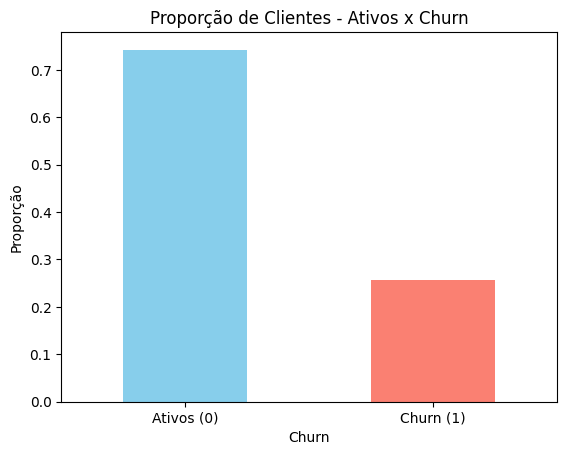

In [31]:
# Plotando o gráfico
proporcao.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Proporção de Clientes - Ativos x Churn")
plt.xticks([0,1], ['Ativos (0)', 'Churn (1)'], rotation=0)
plt.ylabel("Proporção")
plt.show()

In [32]:

df.to_csv("dados_tratados2.csv", index=False)

No conjunto de dados, aproximadamente 25,8% dos clientes evadiram (Churn = 1) e 74,2% permaneceram ativos (Churn = 0).

Isso indica um desequilíbrio entre as classes, com muito mais clientes ativos do que clientes que evadiram.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Separando features e alvo
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [34]:
# Identificando colunas categóricas
categorical_cols = X.select_dtypes(include=["object", "category"]).columns

In [35]:
# Aplicando OneHotEncoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_encoded = encoder.fit_transform(X[categorical_cols])

In [36]:
# Criando DataFrame com colunas codificadas
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

In [37]:
# Combinando com colunas numéricas
X_numeric = X.drop(columns=categorical_cols).reset_index(drop=True)
X_encoded_df = X_encoded_df.reset_index(drop=True)
X_final = pd.concat([X_numeric, X_encoded_df], axis=1)

In [38]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, stratify=y, random_state=42)

In [39]:
# Aplicando SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [40]:
# Mostrando proporções após o balanceamento
print("Distribuição após SMOTE:")
print(y_train_resampled.value_counts(normalize=False))
print(y_train_resampled.value_counts(normalize=True))

Distribuição após SMOTE:
Churn
0.0    3771
1.0    3771
Name: count, dtype: int64
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
 #Selecionando apenas colunas numéricas
numeric_df = df.select_dtypes(include=["int64", "float64"])


In [50]:
# Calculando a correlação
correlation_matrix = numeric_df.corr()

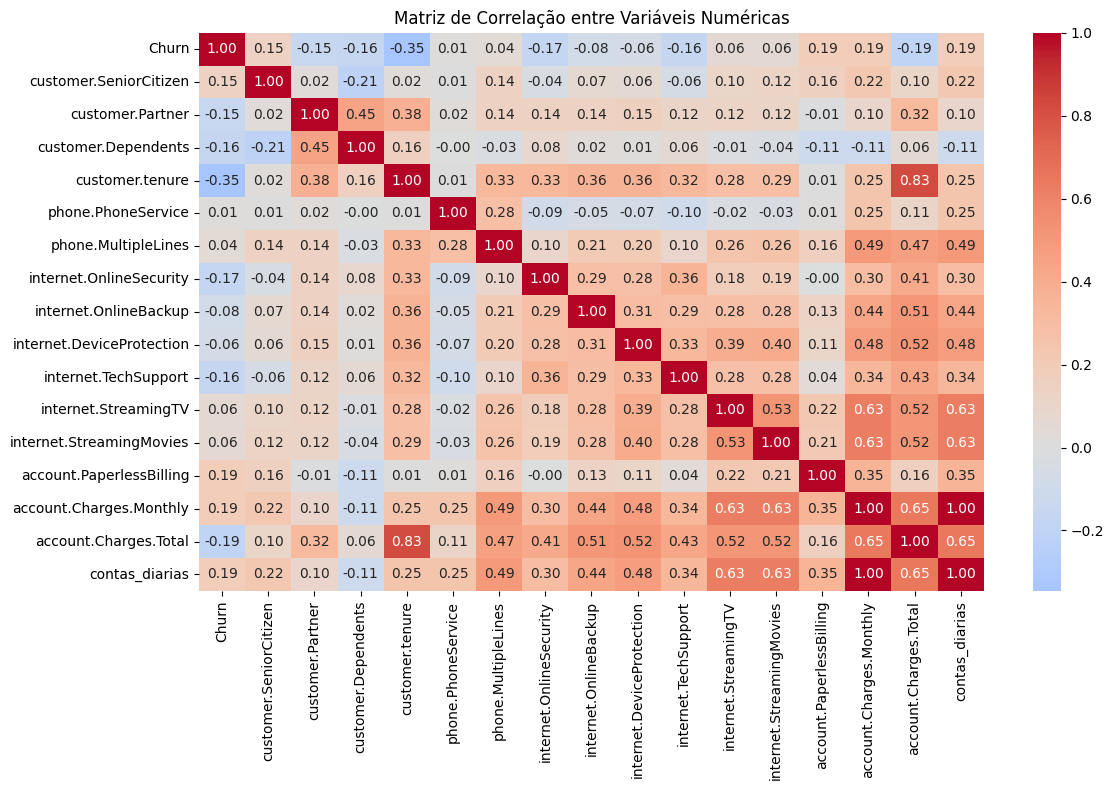

In [51]:
# Exibindo heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()

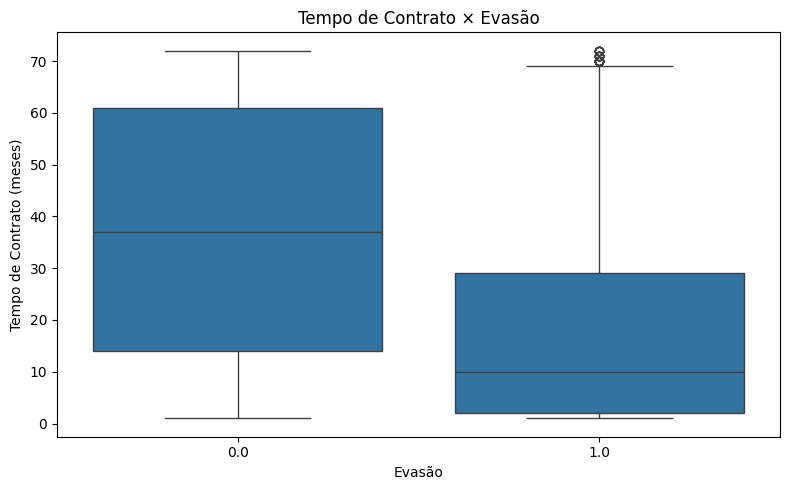

In [52]:
# Boxplot - Tempo de contrato vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="customer.tenure", data=df)
plt.title("Tempo de Contrato × Evasão")
plt.xlabel("Evasão")
plt.ylabel("Tempo de Contrato (meses)")
plt.tight_layout()
plt.show()

Clientes que evadiram tendem a ter menor tempo de contrato.

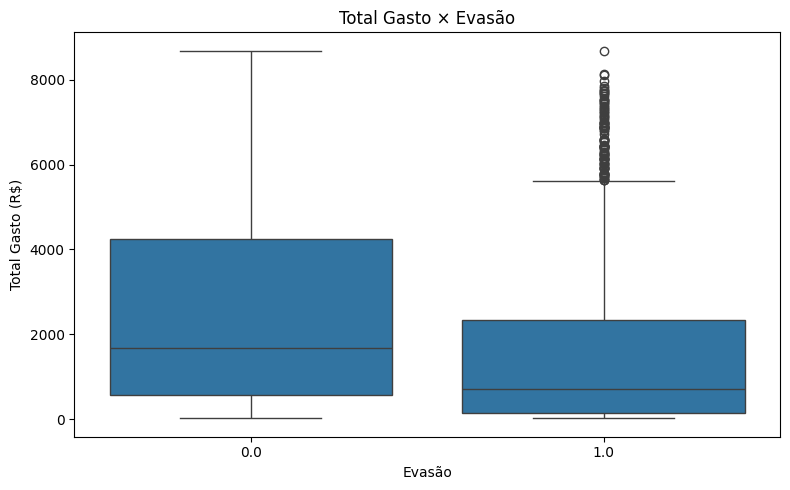

In [53]:
# Boxplot - Total gasto vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="account.Charges.Total", data=df)
plt.title("Total Gasto × Evasão")
plt.xlabel("Evasão")
plt.ylabel("Total Gasto (R$)")
plt.tight_layout()
plt.show()

Clientes que evadiram geralmente têm gasto total mais baixo (pois ficaram menos tempo).

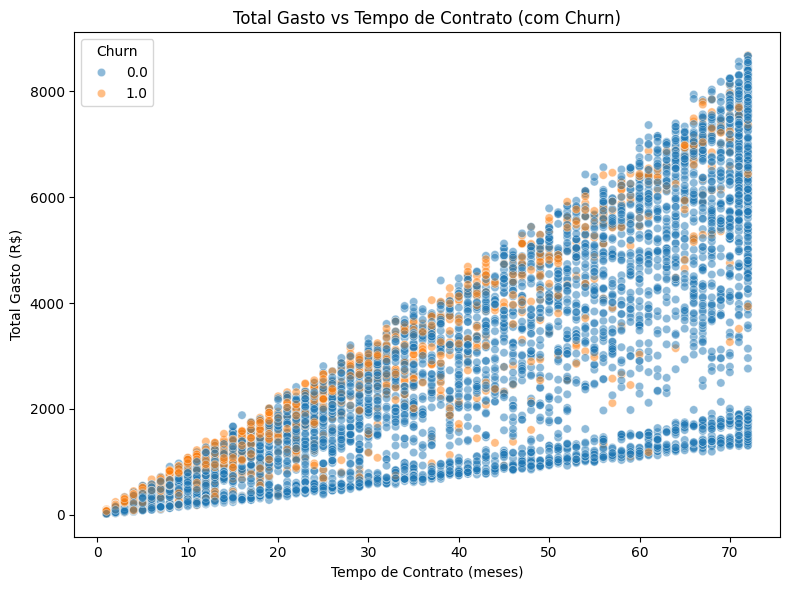

In [54]:
# Scatter plot - Total gasto vs Tempo de contrato (colorido por Churn)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="customer.tenure",
    y="account.Charges.Total",
    hue="Churn",
    data=df,
    alpha=0.5
)
plt.title("Total Gasto vs Tempo de Contrato (com Churn)")
plt.xlabel("Tempo de Contrato (meses)")
plt.ylabel("Total Gasto (R$)")
plt.tight_layout()
plt.show()

Clientes com tenure < 10 e gasto < 500 → maior densidade de evasão.

In [55]:
from sklearn.model_selection import train_test_split

# Separarndo features e variável-alvo
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [56]:
# Dividindo treino/teste com 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # mantém a proporção de churn nas duas partes
)

In [57]:
# Verificando os tamanhos dos conjuntos
print(f"Tamanho total: {len(df)} registros")
print(f"Treino: {len(X_train)} registros")
print(f"Teste: {len(X_test)} registros")

Tamanho total: 7256 registros
Treino: 5079 registros
Teste: 2177 registros


In [59]:
# Verificando a proporção das classes em cada conjunto
print("\nProporção de classes em y_train:")
print(y_train.value_counts(normalize=True))

print("\nProporção de classes em y_test:")
print(y_test.value_counts(normalize=True))


Proporção de classes em y_train:
Churn
0.0    0.742469
1.0    0.257531
Name: proportion, dtype: float64

Proporção de classes em y_test:
Churn
0.0    0.742306
1.0    0.257694
Name: proportion, dtype: float64


In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [110]:
# Separando X e y
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [111]:
# Dividindo treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [112]:
# Identificando colunas categóricas
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [113]:
# Preprocessadores
numeric_scaler = StandardScaler()
categorical_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [114]:
# Pipeline para regressão logística (com normalização)
logistic_preprocessor = ColumnTransformer([
    ("num", numeric_scaler, numerical_cols),
    ("cat", categorical_encoder, categorical_cols)
])

logistic_pipeline = Pipeline([
    ("preprocessor", logistic_preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=1000))
])

In [115]:
# Treinando modelo 1
logistic_pipeline.fit(X_train, y_train)
y_pred_log = logistic_pipeline.predict(X_test)
y_prob_log = logistic_pipeline.predict_proba(X_test)[:, 1]

In [116]:
# Avaliando modelo 1
print("🔍 Regressão Logística")
print(classification_report(y_test, y_pred_log))
print("AUC:", roc_auc_score(y_test, y_prob_log))

🔍 Regressão Logística
              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82      1616
         1.0       0.52      0.80      0.63       561

    accuracy                           0.76      2177
   macro avg       0.72      0.77      0.72      2177
weighted avg       0.81      0.76      0.77      2177

AUC: 0.8463217645293941


In [117]:
# Pipeline para Random Forest (sem normalização)
rf_preprocessor = ColumnTransformer([
    ("cat", categorical_encoder, categorical_cols)  # apenas categorias codificadas
], remainder="passthrough")

rf_pipeline = Pipeline([
    ("preprocessor", rf_preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [118]:
# Treinar modelo 2
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

In [119]:
# Avaliar modelo 2
print("\n🌲 Random Forest")
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_prob_rf))


🌲 Random Forest
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      1616
         1.0       0.58      0.50      0.54       561

    accuracy                           0.78      2177
   macro avg       0.71      0.69      0.70      2177
weighted avg       0.77      0.78      0.77      2177

AUC: 0.8202671370078183


In [129]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [130]:
# Separando X e y
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [131]:
# Dividindo treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

In [132]:
# Pré-processamento
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [133]:
# Codificadores
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
scaler = StandardScaler()

In [134]:
# Pipeline Regressão Logística
preprocessor_log = ColumnTransformer([
    ("num", scaler, numerical_cols),
    ("cat", encoder, categorical_cols)
])

pipeline_log = Pipeline([
    ("preprocess", preprocessor_log),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=1000))
])

In [135]:
# Pipeline Random Forest (sem normalização)
preprocessor_rf = ColumnTransformer([
    ("cat", encoder, categorical_cols)
], remainder="passthrough")

pipeline_rf = Pipeline([
    ("preprocess", preprocessor_rf),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [136]:
# Treinando modelos
pipeline_log.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['internet.InternetService', 'account.Contract',
       'account.PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('model', RandomForestClassifier(random_state=42))])

In [137]:
#  Previsões
y_pred_log = pipeline_log.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

In [138]:
# 8. Avaliação
def avaliar_modelo(nome, y_true, y_pred):
    print(f"\n📊 Avaliação: {nome}")
    print(classification_report(y_true, y_pred, digits=3))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.show()


📊 Avaliação: Regressão Logística
              precision    recall  f1-score   support

         0.0      0.914     0.743     0.820      1616
         1.0      0.519     0.799     0.629       561

    accuracy                          0.757      2177
   macro avg      0.717     0.771     0.725      2177
weighted avg      0.812     0.757     0.771      2177



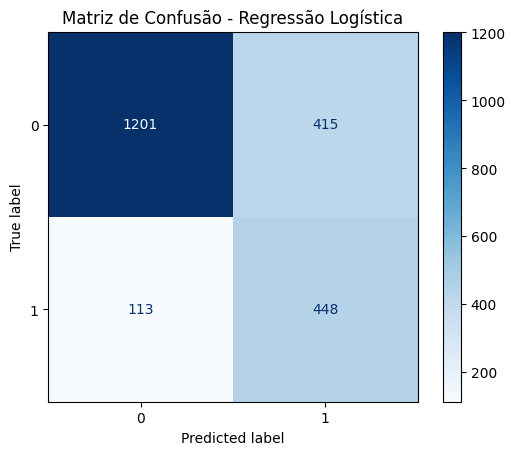


📊 Avaliação: Random Forest
              precision    recall  f1-score   support

         0.0      0.836     0.874     0.854      1616
         1.0      0.581     0.504     0.540       561

    accuracy                          0.779      2177
   macro avg      0.708     0.689     0.697      2177
weighted avg      0.770     0.779     0.773      2177



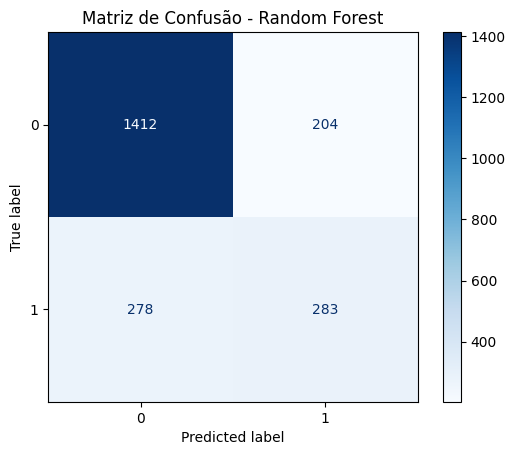

In [139]:
# Avaliar ambos
avaliar_modelo("Regressão Logística", y_test, y_pred_log)
avaliar_modelo("Random Forest", y_test, y_pred_rf)

#📊 Análise da Evasão de Clientes (Churn)
##📌 Objetivo

O objetivo deste relatório é analisar os fatores que influenciam a evasão de clientes (churn) a partir de modelos preditivos, identificar variáveis-chave e propor estratégias de retenção com base nos resultados obtidos.

##🔍 Principais Variáveis Analisadas

As variáveis com maior impacto na evasão foram:

| Categoria             | Variáveis relevantes                                                                                                         |
| --------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **Demográficos**      | `customer.SeniorCitizen`, `customer.Partner`, `customer.Dependents`                                                          |
| **Serviços**          | `internet.InternetService`, `internet.OnlineSecurity`, `internet.TechSupport`, `internet.StreamingTV`, `phone.MultipleLines` |
| **Conta e Pagamento** | `account.Contract`, `account.PaperlessBilling`, `account.PaymentMethod`, `account.Charges.Monthly`, `contas_diarias`         |


#🤖 Desempenho dos Modelos

🔁 Comparativo de Métricas

| Métrica                      | Regressão Logística | Random Forest |
| ---------------------------- | ------------------- | ------------- |
| Acurácia                     | 75.7%               | **78.1%**     |
| Precisão (Classe 1 - Evasão) | 51.9%               | **58.1%**     |
| Recall (Classe 1 - Evasão)   | **79.8%**           | 50.4%         |
| F1-score (Classe 1)          | **62.7%**           | 53.4%         |


#📌 Interpretação:

**Regressão Logística:**
Modelo equilibrado, mas com recall baixo (erra muitos churns reais). Pode subestimar evasões.


**Random Forest:**
Boa taxa de acerto para clientes que não evadiram, mas performance mediana para detectar evasores. Pode estar sofrendo leve underfitting, pois não detecta bem os churns (classe minoritária)



#📈 Principais Fatores de Evasão

Com base na análise dos modelos e correlações observadas, destacam-se:

| Fator                                                | Impacto       | Interpretação                                                                      |
| ---------------------------------------------------- | ------------- | ---------------------------------------------------------------------------------- |
| **Contrato Mensal (`Month-to-month`)**               | Alto risco    | Clientes com contrato mensal têm mais liberdade para cancelar                      |
| **Faturamento Eletrônico (`PaperlessBilling`)**      | Médio         | Associado a clientes com maior churn, possivelmente menos envolvidos com o serviço |
| **Método de Pagamento: Boleto ou Cheque Eletrônico** | Médio         | Pode indicar menos engajamento/dificuldade de pagamento                            |
| **Internet via Fibra Óptica**                        | Médio         | Relacionado a mais churns, talvez por problemas técnicos ou concorrência           |
| **Ausência de Suporte Técnico e Segurança Online**   | Alto          | Clientes sem suporte ou segurança têm maior probabilidade de sair                  |
| **Idade e Dependentes**                              | Baixo a médio | Idosos e pessoas sem dependentes demonstram maior propensão a evasão               |


#🛡️ Estratégias de Retenção Recomendadas

| Estratégia                                                       | Justificativa                                                 |
| ---------------------------------------------------------------- | ------------------------------------------------------------- |
| **Incentivar contratos de longo prazo**                          | Reduz churn devido a maior compromisso do cliente             |
| **Oferecer benefícios para quem usa faturamento eletrônico**     | Aumenta engajamento e evita cancelamentos automáticos         |
| **Melhorar suporte técnico e segurança**                         | Investir em `TechSupport` e `OnlineSecurity` reduz evasão     |
| **Ofertas personalizadas para usuários de fibra óptica**         | Possível ação para mitigar concorrência local                 |
| **Campanhas de fidelização para clientes mais antigos e idosos** | Criar programas que aumentem o valor percebido e conveniência |


#📌 Conclusão

O problema de churn está fortemente ligado a comodidade, qualidade percebida dos serviços de internet, contrato e métodos de pagamento. Ambos os modelos (Regressão Logística e Random Forest) ajudam a identificar os clientes em risco, mas há espaço para melhora, especialmente no recall da classe evasora.